In [75]:
import numpy as np
import pandas as pd

### Сразу полезные ссылки:

- [Документация matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

- [Документация seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

- [Для вдохновения matplotlib](https://matplotlib.org/stable/gallery/index.html)

- [Для вдохновения seaborn](https://seaborn.pydata.org/examples/index.html)

- [ля вдохновения seaborn еще немного](https://python-graph-gallery.com/)

### Визуализация в Python

Самые популярные библиотеки для создания графиков - `matplotlib` и `seaborn`.

`matplotlib` - более низкоуровневая библиотека, которая предоставляет широчайший спектр возможностей для визуализации. Многие другие библиотеки построены на основе matplotlib.

В большинстве случаев из неё будет нужен только модуль `matplotlib.pyplot`, в котором находятся все базовые функции для создания графиков.

! Много аргументов для кастомизации графиков ! Запоминать **не надо**, надо гуглить !

In [77]:
import matplotlib.pyplot as plt # plt - конвенция
import seaborn as sns # sns - конвенция

Некоторые функции для построения графиков в `matplotlib.pyplot`:

- `plot()`

- `scatter()`

- `hist()`

- `pie()`

Функция `plot()` - построение кривой

Два обязательных аргумента: x и y, которые принимают как одиночные числа, так и любые контейнеры (списки, кортежи, arrays, пандасовские серии)

Длины контейнеров x и y **должны быть одинаковыми**

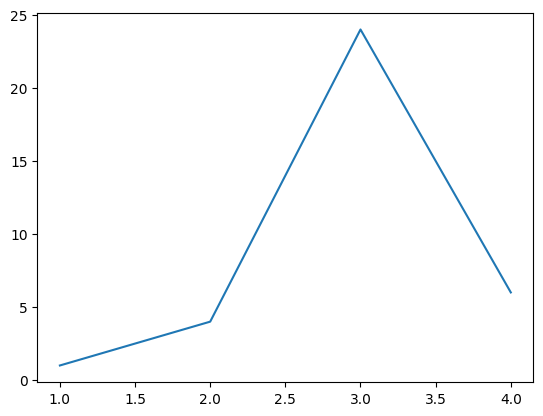

In [78]:
x = [1, 2, 3, 4]
y = [1, 4, 24, 6]
plt.plot(x, y)

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

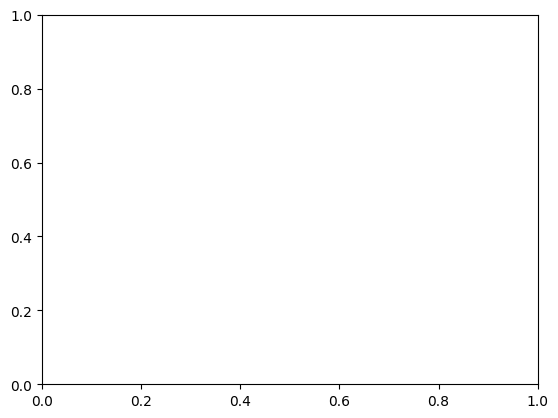

In [5]:
x = [1, 2, 3, 4]
y = [1, 4, 24, 6, 55]
plt.plot(x, y)

Чем больше значений (точек) - тем более гладкая кривая

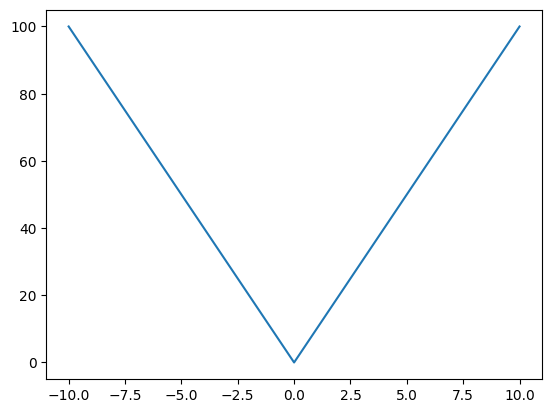

In [82]:
x = np.linspace(-10, 10, 3)
#x = np.linspace(-10, 10, 10)
#x = np.linspace(-10, 10, 100)
y = x ** 2
plt.plot(x, y)

`matplotlib` не сортирует данные.

`plt.plot()` просто соединяет точки линиями -> это не настоящий график функции, обе координаты могут независимо меняться.

Если нужен график по отсортированным данным, то данные нужно отсортировать.

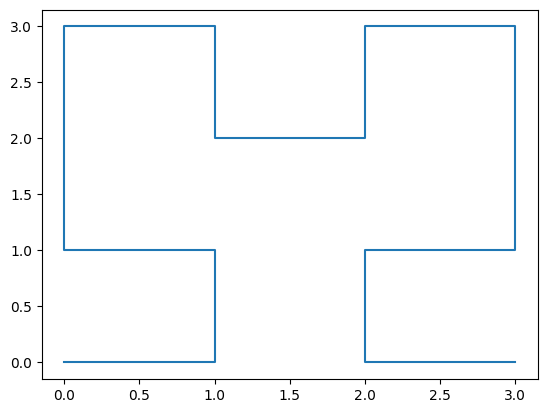

In [7]:
x = [0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 2, 2, 3]
y = [0, 0, 1, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 0, 0]
plt.plot(x, y)

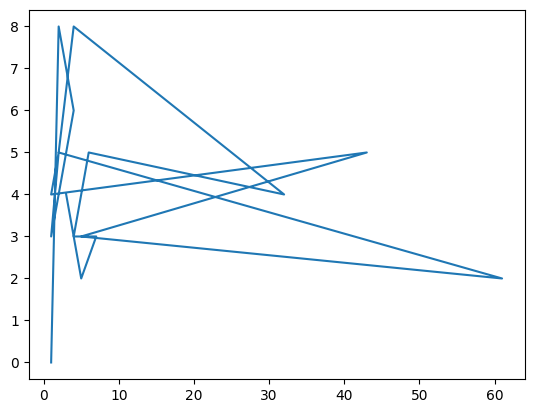

In [8]:
# sort that later 

x = [1, 2, 4, 1, 2, 1, 43, 5, 61, 2, 4, 32, 6, 4, 7, 5, 3]
y = [0, 8, 6, 3, 5, 4, 5, 3, 2, 5, 8, 4, 5, 3, 3, 2, 4]
plt.plot(x, y)

Можно пропускать значения

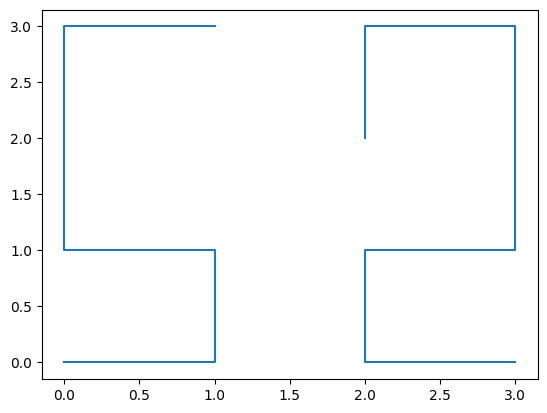

In [9]:
x = [0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 2, 2, 3]
y = [0, 0, 1, 1, 2, 3, 3, np.nan, 2, 3, 3, 2, 1, 1, 0, 0]
plt.plot(x, y)

Графики могут накладываться друг на друга.

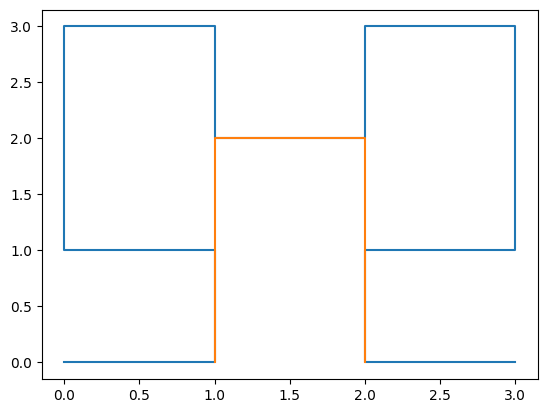

In [10]:
x = [0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 2, 2, 3]
y = [0, 0, 1, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 0, 0]
plt.plot(x, y)
plt.plot([1, 1, 2, 2], [0, 2, 2, 0])

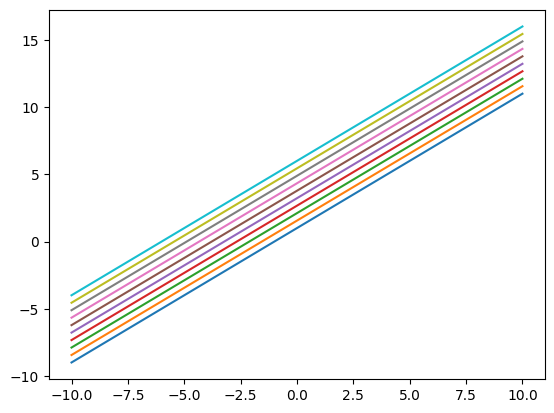

In [11]:
x = np.linspace(-10, 10, 1000)
for shift in np.linspace(1, 6, 10):
    plt.plot(x, x + shift)

В качестве аргументов функции можно передавать серии пандас (все аналогично) и датафреймы (все очень изменится)

In [12]:
for_plots = pd.DataFrame(list(zip([1, 2, 3], [4, 5, 6])), columns=["mass", "height"])

In [13]:
for_plots

,mass,height
0,1,4
1,2,5
2,3,6


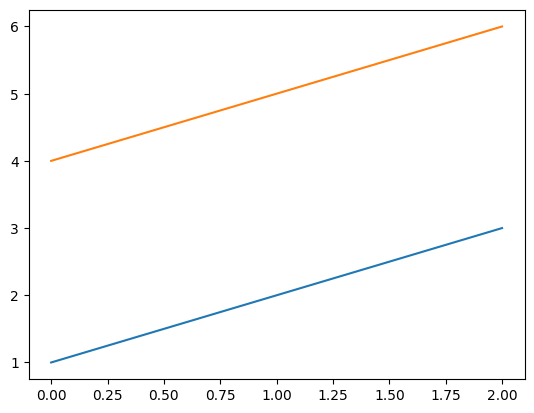

In [14]:
plt.plot(for_plots)

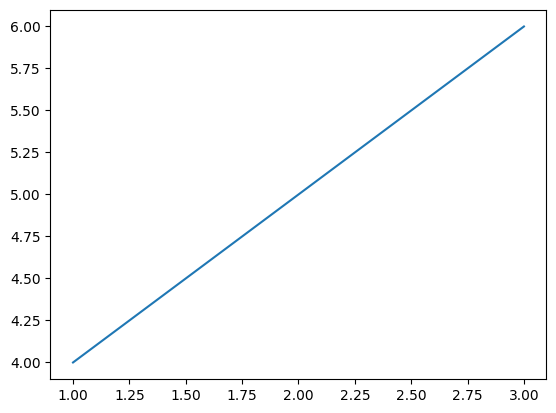

In [15]:
plt.plot(for_plots.mass, for_plots.height)

In [16]:
for_plots_2 = pd.DataFrame(list(zip([1, 5, 3], [4, 5, 6])), columns=["mass", "height"])

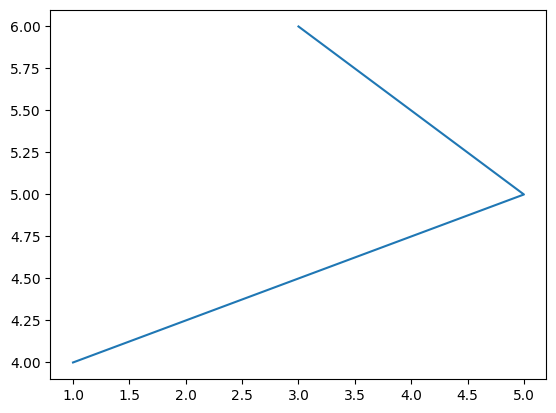

In [17]:
plt.plot(for_plots_2.mass, for_plots_2.height)

In [18]:
titanic = sns.load_dataset("titanic")

In [19]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

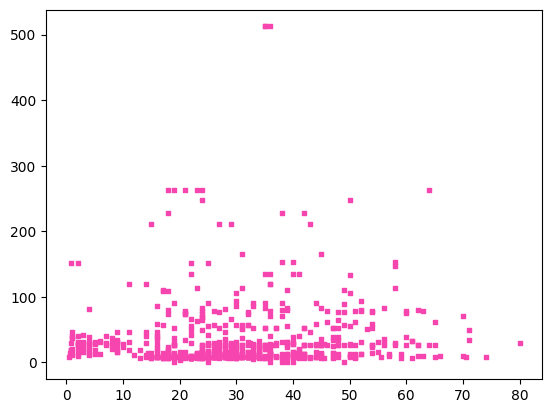

In [20]:
plt.scatter(titanic.age, titanic.fare, s=10, c="#f645ae", marker="s")

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

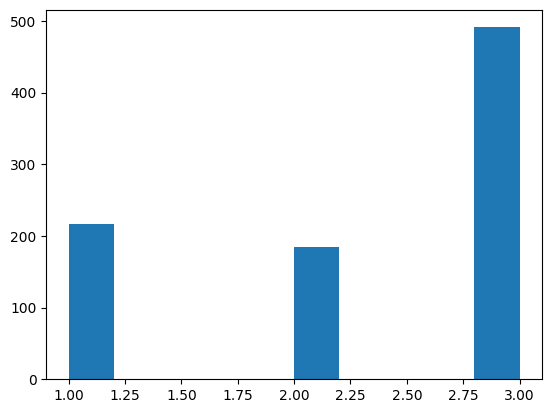

In [21]:
plt.hist(titanic.pclass)

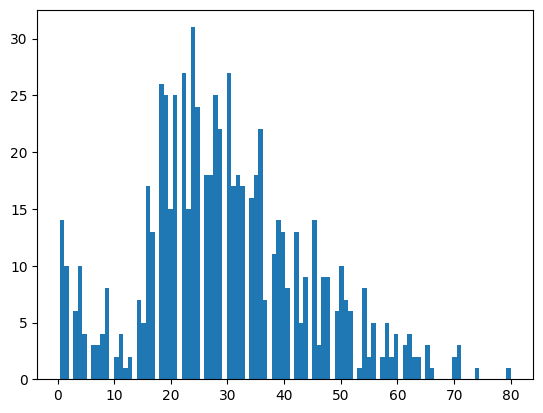

In [22]:
plt.hist(titanic.age, bins=100)
None

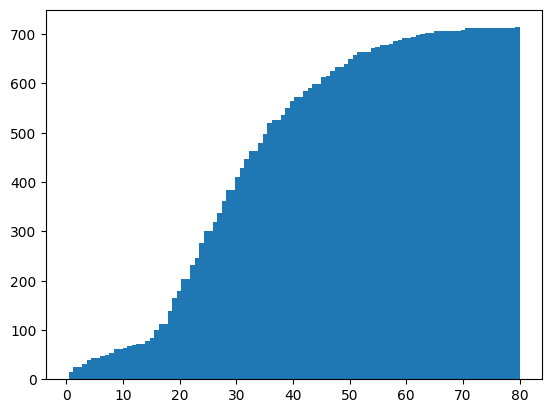

In [23]:
plt.hist(titanic.age, bins=100, cumulative=True)
None

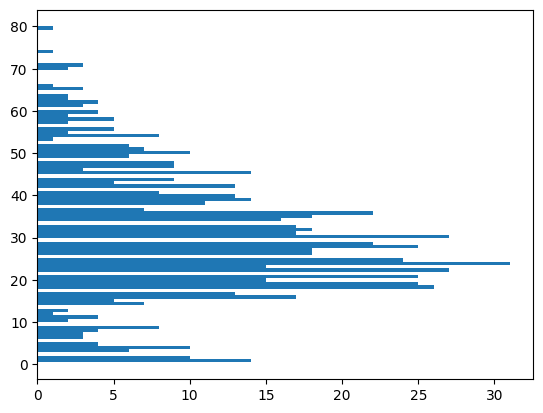

In [24]:
plt.hist(titanic.age, bins=100, orientation="horizontal")
None

`plt.bar()` - удобнее для распределения категориальных данных (но не принципиально), но в matplotlib она довольно неудобная (лучше sns)

В качестве второго аргумента принимает высоту баров.

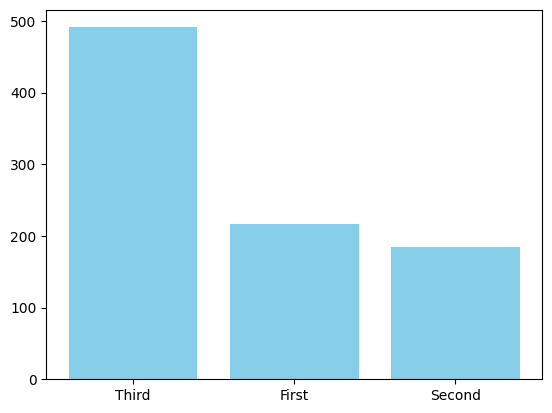

In [25]:
class_counts = titanic['class'].value_counts()

categories = class_counts.index
values = class_counts.values

plt.bar(categories, values, color='skyblue')
None

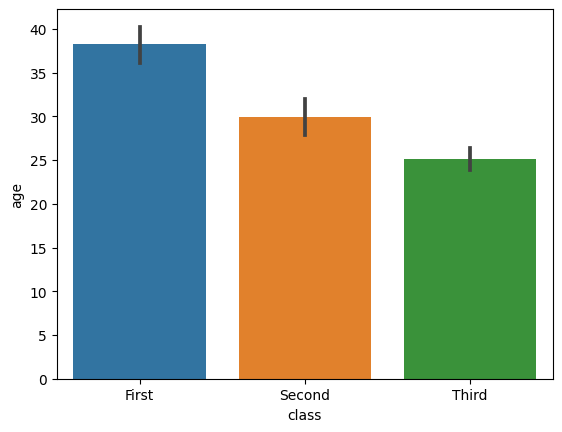

In [26]:
sns.barplot(data=titanic, x='class', y="age")
None

`plt.pie()` - долевое отношение

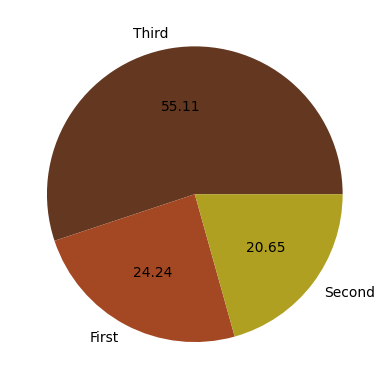

In [27]:
plt.pie(class_counts.values, labels=class_counts.index, colors=["#643820", "#a34823", "#afa021"], autopct="%.2f")
None

`plt.boxplot()` - пожалуйста, не надо

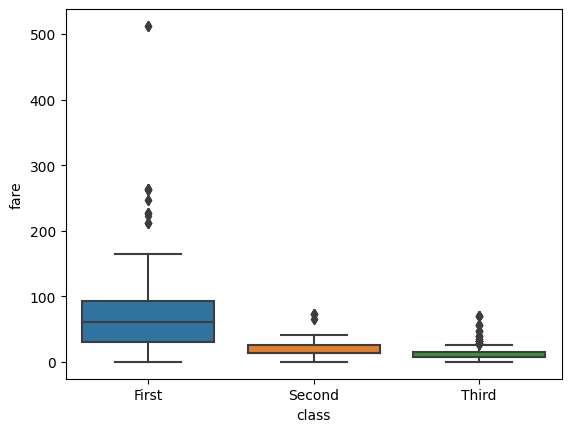

In [28]:
sns.boxplot(titanic, x="class", y="fare")
None

Кастомизация

Анатомия графика

![Figure_anatomy](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

Картинка сделана при помощи [кода на matplotlib](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

Объект `Figure` - то, что мы видим при построении графика, с помощью функции `plt.figure()` можно создавать новые объекты для графиков.

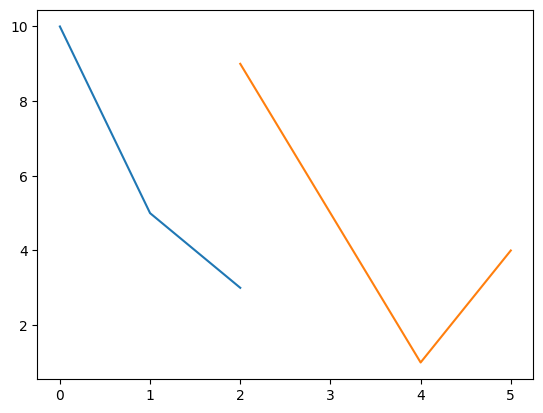

In [29]:
plt.plot([0, 1, 2], [10, 5, 3])
plt.plot([5, 4, 2], [4, 1, 9])
None

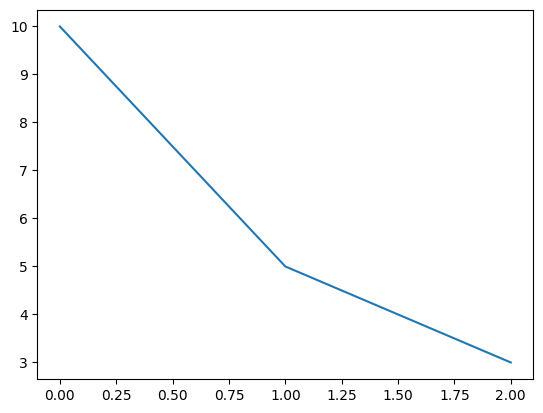

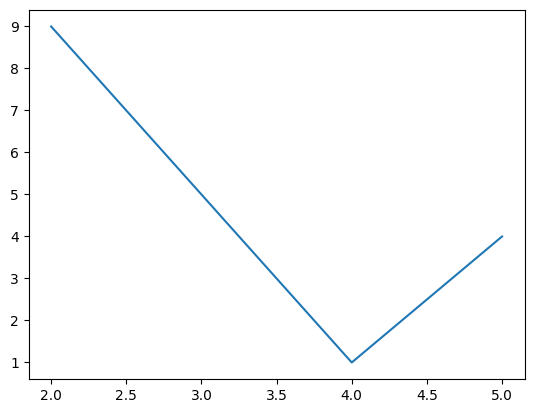

In [30]:
plt.plot([0, 1, 2], [10, 5, 3])
plt.figure()
plt.plot([5, 4, 2], [4, 1, 9])
None

Axes - один subplot, Figure может быть разделена на несколько axes.

`Axes` можно создавать функцией `plt.subplots`:

Данной функции можно указать число строк (`nrows`), число колонок (`ncols`), размеры `Figure` в дюймах (`figsize`)

На `Axes` можно рисовать по отдельности

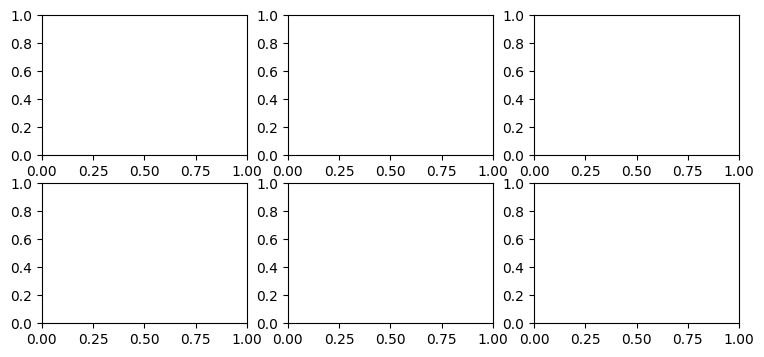

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 4))

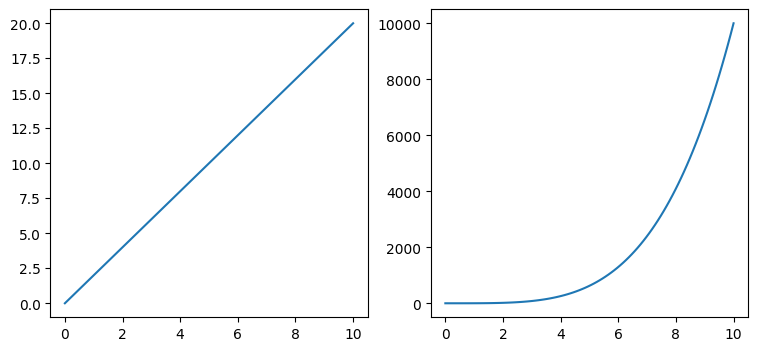

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

x = np.linspace(0, 10, 100)
y1 = x * 2
y2 = x ** 4

axes[0].plot(x, y1)
axes[1].plot(x, y2)
None

Другой вариант для построения фигур с несколькими графиками на них - использование функции plt.subplot(). Она принимает 3 аргумента: количество рядов, количество колонок и номер графика. Нумерация графика начинается с 1 (!!). Данная функция сразу обращается к выбранному графику на картинке.

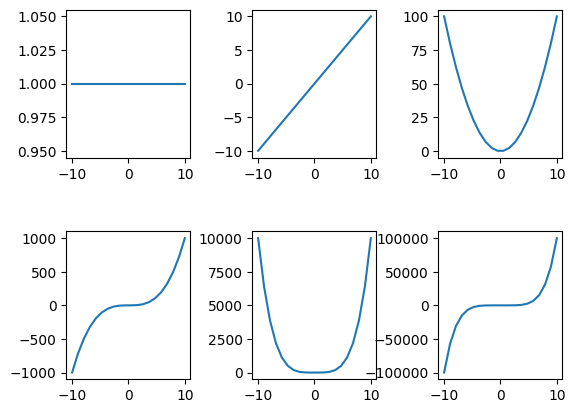

In [3]:
x = np.linspace(-10, 10, 20)


for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, x ** i)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

`hlines`, `vlines` - построение горизонтальной и вертикальной линии

Принимают обязательные аргументы:

- координата прямой на другой оси
- начало и конец прямой на её оси

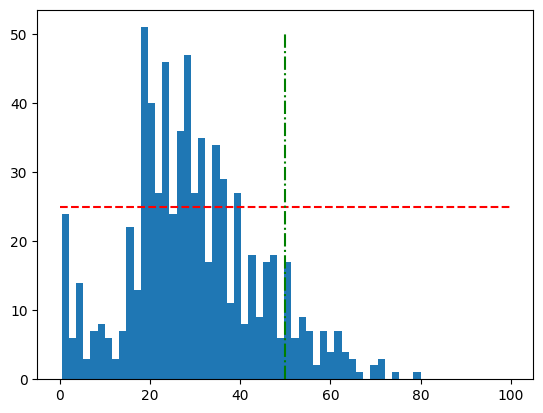

In [84]:
plt.hist(titanic.age, bins=50)
plt.hlines(25, 0, 100, linestyles="--", colors="red")
plt.vlines(50, 0, 50, linestyle="-.", colors="green")
None

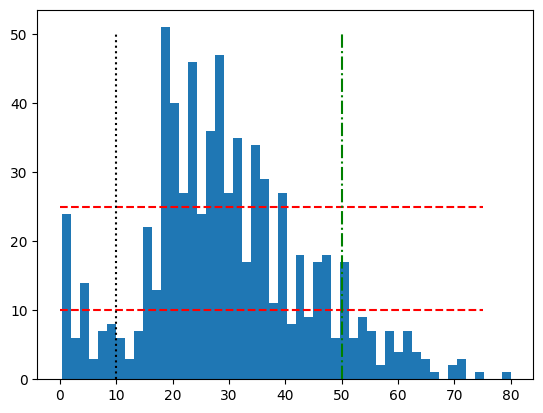

In [85]:
plt.hist(titanic.age, bins=50)
plt.hlines([10, 25], 0, 75, linestyles="--", colors="red")
plt.vlines(50, 0, 50, linestyle="-.", colors="green")
plt.vlines(10, 0, 50, linestyle=":", colors="k")

Аннотация графиков

`plt.text()` - написать текст на графике

`plt.annotate()` - аннотация со стрелочкой

In [36]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [86]:
titanic.age[titanic.fare == max(titanic.fare)]

258    35.0
679    36.0
737    35.0
Name: age, dtype: float64

Text(0, 210, 'cheap_tickets')

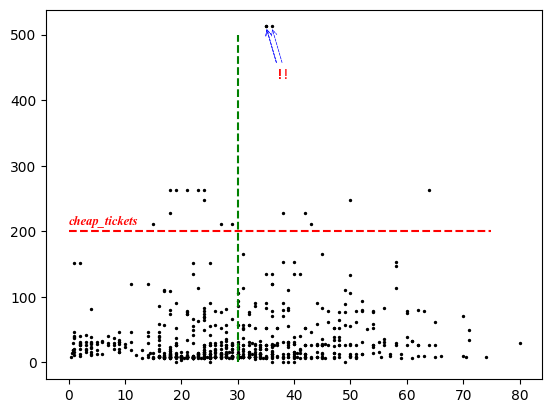

In [38]:
plt.scatter(titanic.age, titanic.fare, c="k", s=2)

plt.hlines(200, 0, 75, linestyles="--", colors="red")
plt.vlines(30, 0, 500, linestyle="--", colors="green")

annot_x, annot_y = titanic.age[titanic.fare == max(titanic.fare)].tolist(), titanic.fare[titanic.fare == max(titanic.fare)].tolist()

for x, y in zip(annot_x, annot_y):
    plt.annotate("!", xy=(x, y), xytext=(x + 2, y - 80), c="red",
                 arrowprops=dict(arrowstyle= '->',
                                 color='blue',
                                 lw=0.5,
                                 ls='--'))
    
plt.text(x=0, y=210, 
         s="cheap_tickets", size=9, 
         weight="bold", style="italic", 
         color="red", font="Times New Roman")

Функции `title`, `xlabel`, `ylabel` позволяют делать подписи к `Axes`, но **НЕ** к `Figure`

Методы объекта `Figure`: `suptitle`, `supxlabel`, `supylabel` позволяют делать подписи к `Figure`

Для того, чтобы задать лейблы для отдельных `Axes`, нужно пользоваться методами `set_title`, `set_xlabel` и `set_ylabel`. Вообще у многих функций из `plt` есть аналоги, применяемые к `Axes`, но они имеют префикс `set_`

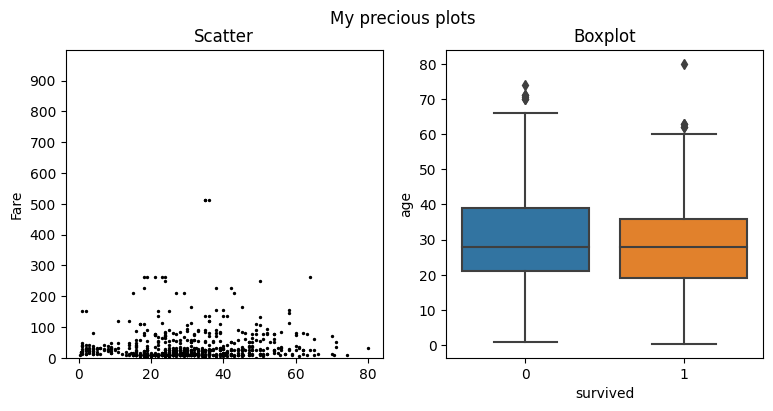

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ax[0].scatter(titanic.age, titanic.fare, c="k", s=2)
sns.boxplot(y=titanic.age, x=titanic.survived, ax=ax[1])
plt.suptitle("My precious plots")
ax[0].set_title("Scatter")
ax[1].set_title("Boxplot")

ax[0].set_ylabel("Fare")
ax[0].set_ylim((0, 1000))
ax[0].set_yticks(range(0, 1000, 100))
ax[0].set_yticklabels(range(0, 1000, 100))

None

### Legend, grid

Для построения легенды используется функция `legend`. Легенда строится автоматически, но для этого нужно указывать аргумент `label` при построении графиков

Функция `grid` используется для построения сетки

Text(0.5, 0, 'Age')

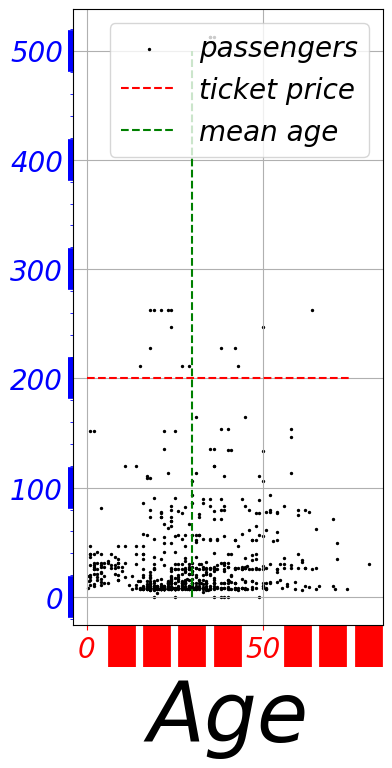

In [66]:
plt.scatter(titanic.age, titanic.fare, c="k", s=2, label="passengers")

plt.hlines(200, 0, 75, linestyles="--", colors="red", label="ticket price")
plt.vlines(30, 0, 500, linestyle="--", colors="green", label="mean age")

plt.legend()
plt.grid()

plt.xlabel("Age", size=60)

Сохранить график можно при помощи функции `plt.savefig` или метода `Figure` `savefig`

Данные функции по своей сути одинаковы:
1. Первый аргумент - имя файла
2. `bbox_inches="tight"` - позволяет избавится от обрезания лейблов
3. `dpi` (dots per inch) - плотность пикселей в картинке

Обычно нужны только эти три аргумента

In [ ]:
plt.scatter(titanic.age, titanic.fare, c="k", s=2, label="passengers")

plt.hlines(200, 0, 75, linestyles="--", colors="red", label="ticket price")
plt.vlines(30, 0, 500, linestyle="--", colors="green", label="mean age")

plt.legend()
plt.grid()

plt.xlabel("Age", size=60)
plt.savefig("my_plot.png", bbox_inches="tight", dpi=300)

### Стили для ленивых

Можно использовать функцию `plt.style.use`, которой можно передать имя [одного из стандартных стилей](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) **matplotlib**.

При исполнении функции стиль применяется глобально, ко всем далее построенным графикам

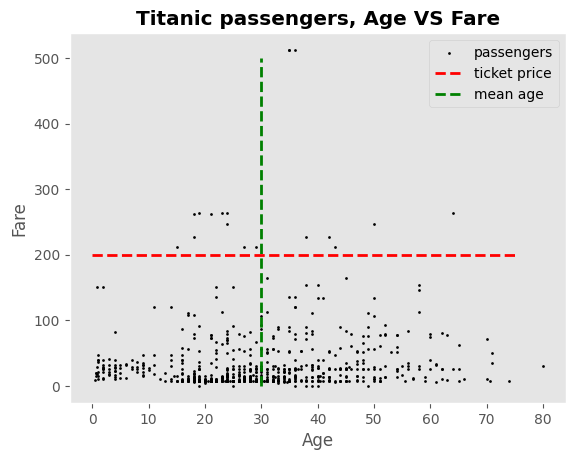

In [54]:
plt.style.use("ggplot")

plt.scatter(titanic.age, titanic.fare, c="k", s=2, label="passengers")

plt.hlines(200, 0, 75, linestyles="--", colors="red", label="ticket price")
plt.vlines(30, 0, 500, linestyle="--", colors="green", label="mean age")

plt.xlabel("Age", size=12)
plt.ylabel("Fare", size=12)
plt.title("Titanic passengers, Age VS Fare", weight="bold")

plt.legend()
plt.grid()



In [55]:
plt.style.use("default")

Кастомизация разных типов графиков

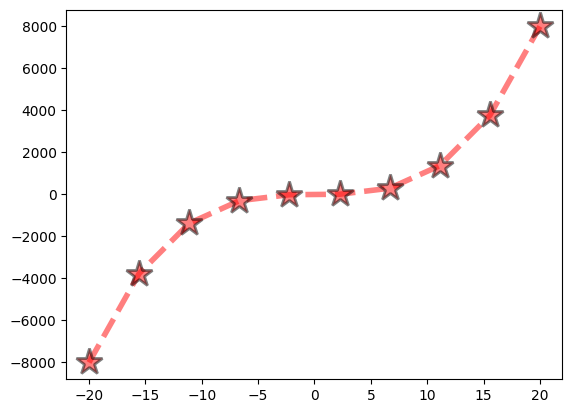

In [58]:
x = np.linspace(-20, 20, 10)
y = x ** 3
plt.plot(x, y, 
         linewidth=4, color="red", 
         linestyle="--", marker="*", 
         markersize=20, alpha=0.5, 
         markeredgecolor="#000000", markeredgewidth=2)

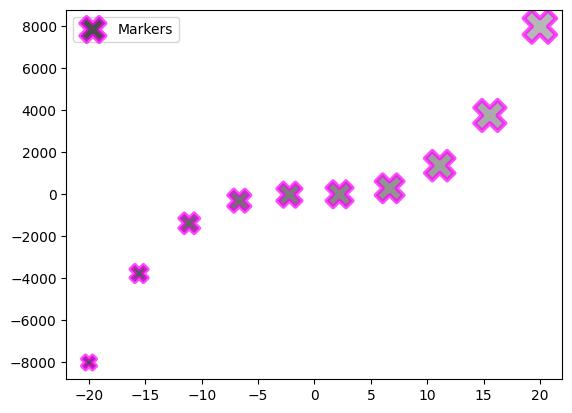

In [59]:
x = np.linspace(-20, 20, 10)
sizes = range(100, 600, 50)
colors = ["#000000", "#111111", "#222222", "#333333", "#444444", "#555555", "#666666", "#777777", "#888888", "#999999"]
y = x ** 3
plt.scatter(x, y, s=sizes, c=colors, marker="X", alpha=0.7, edgecolors="magenta", linewidths=3, label="Markers")
plt.legend()

/tmp/ipykernel_4050/2824455774.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.ylabel("$\sum_{i=0}^{5}(a + b)^i$", rotation=90, size=30, weight="bold", color="green", alpha=0.9, bbox=dict(boxstyle="Round", color="w", edgecolor="k"))


Text(0.3, 0.3, 'Some text')

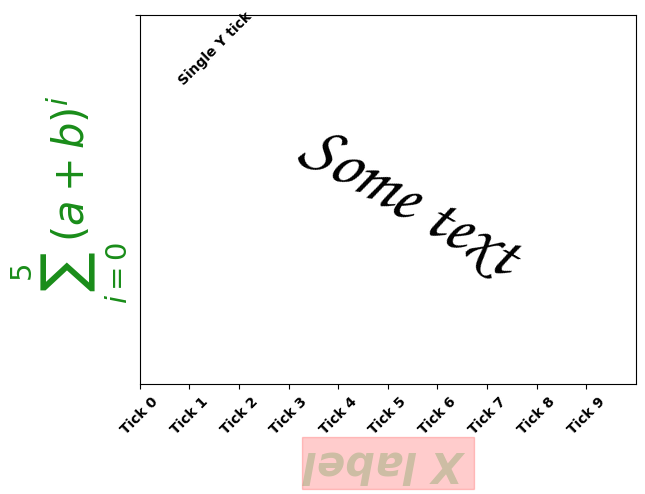

In [60]:
# Кастомизация лейблов

plt.subplots()
plt.xlabel("X label", rotation=180, size=30, style='italic', weight="bold", color="green", alpha=0.2, backgroundcolor=(1, 0, 0, 0.2))
plt.ylabel("$\sum_{i=0}^{5}(a + b)^i$", rotation=90, size=30, weight="bold", color="green", alpha=0.9, bbox=dict(boxstyle="Round", color="w", edgecolor="k"))
plt.xticks(ticks=np.arange(0, 1, 0.1), labels=[f"Tick {i}" for i in range(10)], rotation=45, weight="heavy")
plt.yticks(ticks=[1], labels=["Single Y tick"], rotation=45, weight="heavy", position=(0.25, 0.6))
plt.text(0.3, 0.3, s="Some text", rotation=-30, size=50, weight='ultralight', fontfamily="z003")

In [61]:
# Кастомизация всего

plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

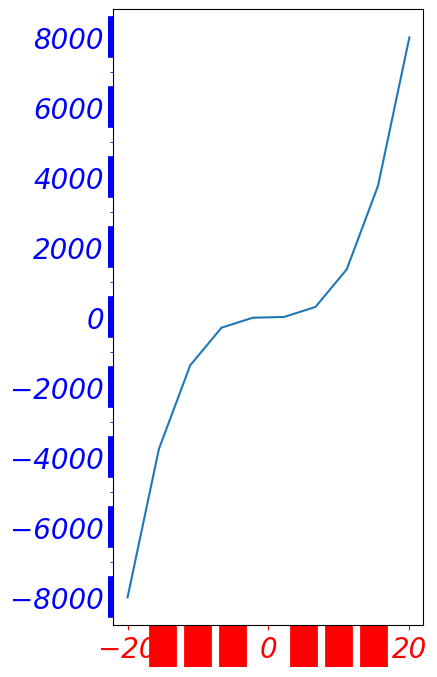

In [65]:
plt.rcParams["figure.figsize"] = (4, 8)
plt.rcParams["font.size"] = 20
plt.rcParams["font.style"] = "italic"
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.minor.size"] = 30
plt.rcParams["xtick.minor.width"] = 20
plt.rcParams["ytick.major.width"] = 30
plt.rcParams["xtick.color"] = "red"
plt.rcParams["ytick.color"] = "blue"

plt.plot(x, y)

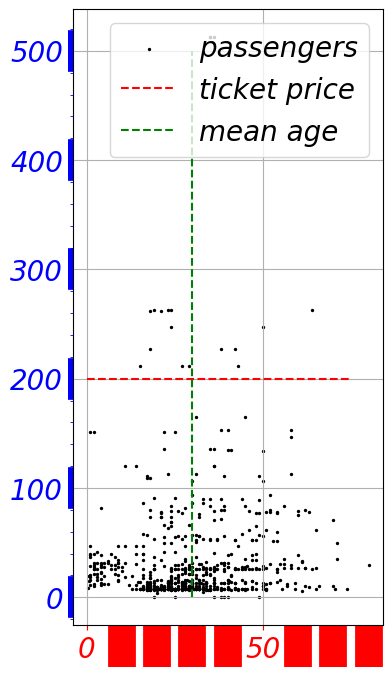

In [67]:
plt.scatter(titanic.age, titanic.fare, c="k", s=2, label="passengers")

plt.hlines(200, 0, 75, linestyles="--", colors="red", label="ticket price")
plt.vlines(30, 0, 500, linestyle="--", colors="green", label="mean age")

plt.legend()
plt.grid()

Или можно воспользоваться функцией `plt.rc`. Она работает по тому же приципу.

Первый аргумент - тип объекта, который вы хотите кастомизировать.

Далее можно указывать именованные аргументы, соответствующие кастомизируемым свойствам этого объекта

In [72]:
plt.rc("figure", figsize=(4, 5))
plt.rc("font", size=15)
plt.rc("font", style="italic")
plt.rc("xtick.minor", visible=True)
plt.rc("ytick.minor", visible=True)
plt.rc("xtick.minor", size=10)
plt.rc("xtick.minor", width=5)
plt.rc("ytick.major", width=1)
plt.rc("xtick", color="red")
plt.rc("ytick", color="blue")

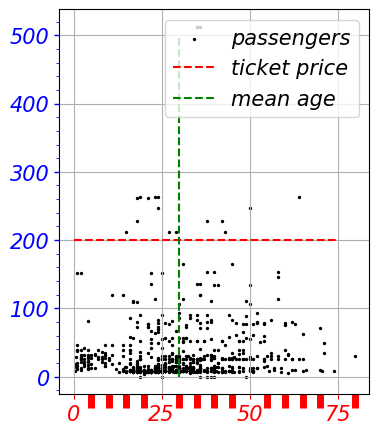

In [73]:
plt.scatter(titanic.age, titanic.fare, c="k", s=2, label="passengers")

plt.hlines(200, 0, 75, linestyles="--", colors="red", label="ticket price")
plt.vlines(30, 0, 500, linestyle="--", colors="green", label="mean age")

plt.legend()
plt.grid()

In [87]:
plt.style.use("default")

# Seaborn

**Seaborn** - ещё одна популярная библиотека для визуализаций в питоне. Она гораздо более высокоуровневая, чем **matplotlib** и ей проще пользоваться. Она чем то может напоминать **ggplot2**. С использованием этой библиотеки, как правило, получаются более красивые графики "из коробки", чем в **matplotlib**

**Seaborn** очень тесно интегрирована с **pandas** и на самом деле является надстройкой над **matplotlib**. Функции данной библиотеки ожидают на вход датафрейм, из которого будут взяты данные для графика. Сам **seaborn** не предоставляет такого большого пространства для кастомизации, как **matplotlib**, но графики построенные в **seaborn** **ПОЛНОСТЬЮ СОВМЕСТИМЫ** c **matplotlib**. Т.е. мы можем кастомизировать графики из **seaborn** при помощи **matplotlib**, это супер круто и удобно.

## Функции

Ниже приведён список некоторых функций для построения графиков в **seaborn**. Советую ознакомиться самостоятельно со всем спектром графиков seaborn и их аргументами:

+ `sns.lineplot` - построение кривой (аналог `plot` из **matplotlib**)
+ `sns.scatterplot` - построение точек (аналог `scatter` из **matplotlib**)
+ `sns.boxplot` - построение боксплота (аналог `boxplot` из **matplotlib**)
+ `sns.barplot` - построение столбчатой диаграмы (аналог `bar` из **matplotlib**)
+ `sns.xxxplot` - построение графика xxx, таких xxx в **seaborn** довольно много

## Структура и принцип работы функций

Функции для построения графиков в **seaborn** принимают несколько важных **именованных** аргументов:

1. `data` - датафрейм по которому нам нужно построить график. Вообще, это может быть не только датафрейм, но чаще всего используют именно их
2. `x`, `y`, `z` - значения переменных для каждой из осей. Это могут быть как контейнеры по типу списков и эрреев, а также _строки_, указывающие на столбцы в датафрейме
3. Группирующие переменные (такие аргументы как `hue`, `size`, `style` и т.д.) - позволяют нанести на 2d график более 2 измерений, благодаря использованию разных цветов, размеров и стилей элементов

При построении графика у нас будут сопоставляться точки с одинаковыми индексами из данных колонок датафрейма

In [97]:
sport = sns.load_dataset("exercise").drop(columns=["Unnamed: 0"])

In [98]:
sport.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


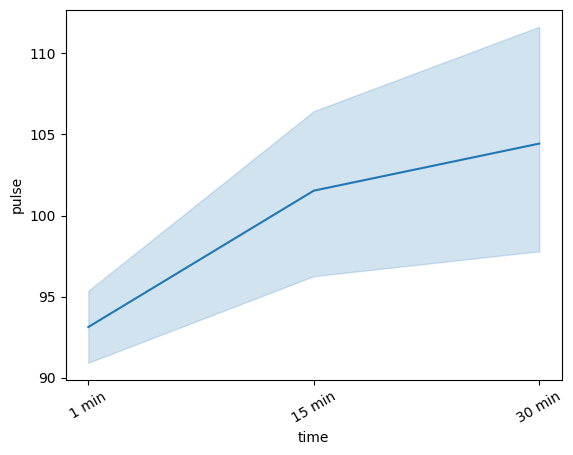

In [105]:
sns.lineplot(x="time", y="pulse", data=sport)   # date и new_cases - колонки в датафрейме data_subset
plt.xticks(ticks=range(3), rotation=30);

В функции **seaborn** можно указывать параметры кастомизации графиков аналогичные **matplotlib**, но иногда они называются по другому, так что нужно гуглить.

Если указать `label`, то **seaborn** строит легенду автоматически

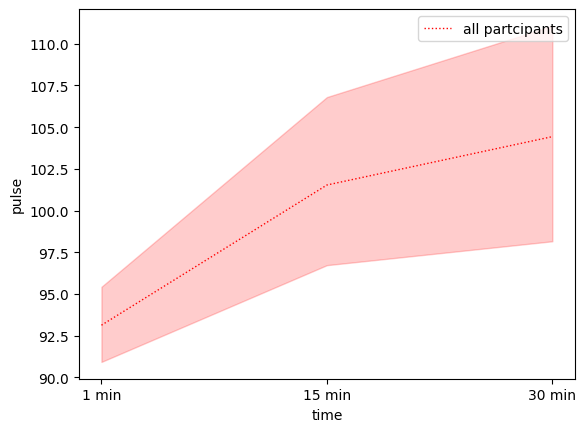

In [108]:
sns.lineplot(x="time", y="pulse", 
             data=sport, linestyle="dotted", 
             linewidth=1, color="red", 
             markers="+", label="all partcipants") 
None

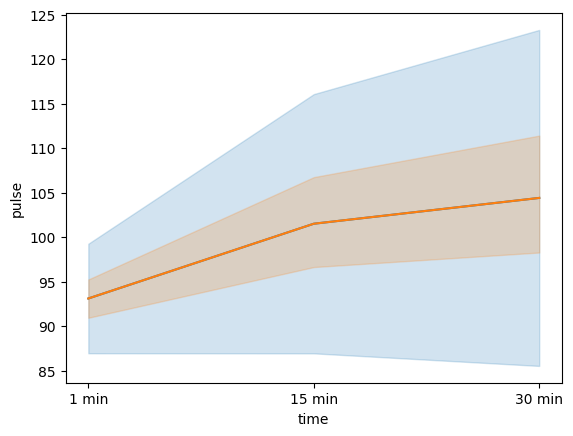

In [115]:
sns.lineplot(x="time", y="pulse", 
             data=sport, errorbar="sd")
sns.lineplot(x="time", y="pulse", 
             data=sport, errorbar=('ci', 95))
None

Введём третью переменную через цвет при помощи аргумента `hue`.

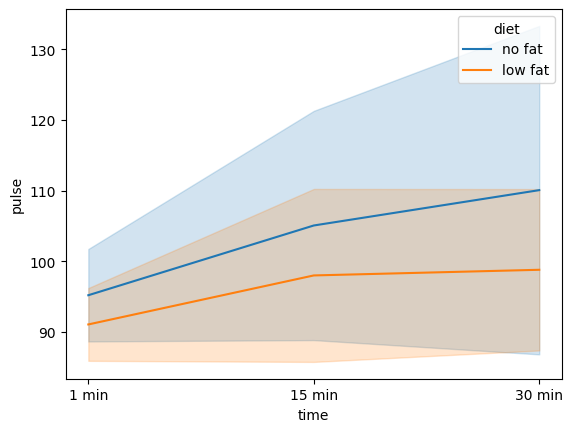

In [129]:
sns.lineplot(x="time", y="pulse", 
             data=sport, errorbar="sd", 
             hue="diet")

None

Также третью переменную можно кодировать стилем линии.

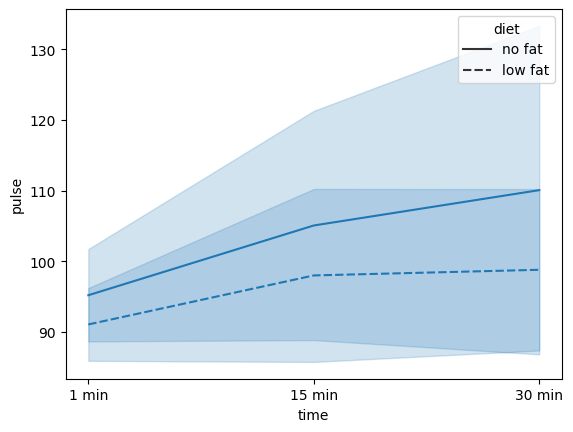

In [130]:
sns.lineplot(x="time", y="pulse", 
             data=sport, errorbar="sd", 
             style="diet")

None

Со scatterplot ещё можно указывать размер точек в качестве ещё одной переменной

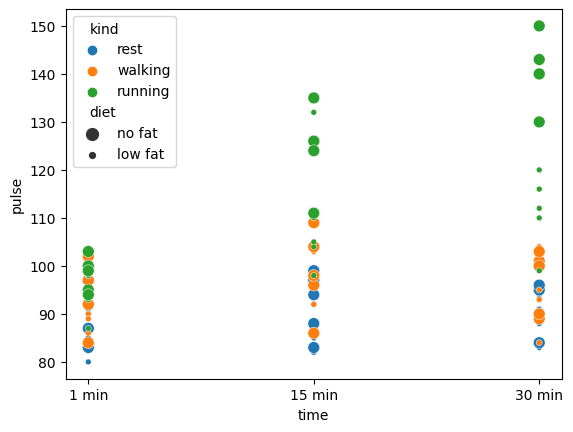

In [137]:
sns.scatterplot(sport, 
                x="time", y="pulse", 
                hue="kind", size="diet")
None

Boxplot строится очень легко, просто передаём `x` и `y`, по-желанию `hue`. `size` и `style` для boxplot указать нельзя

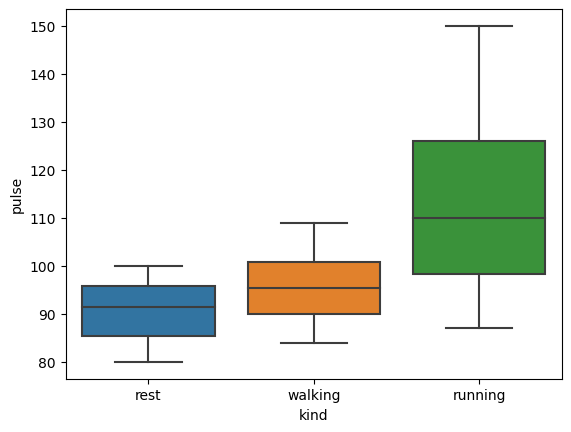

In [140]:
sns.boxplot(sport, 
            x="kind", y="pulse")

None

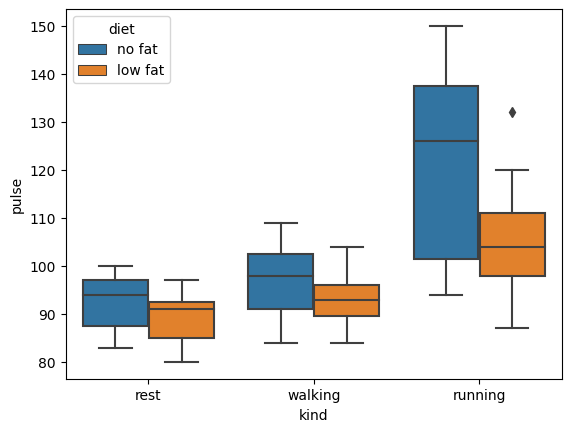

In [139]:
sns.boxplot(sport, 
            x="kind", y="pulse",
            hue="diet")

None

barplot строится аналогично:

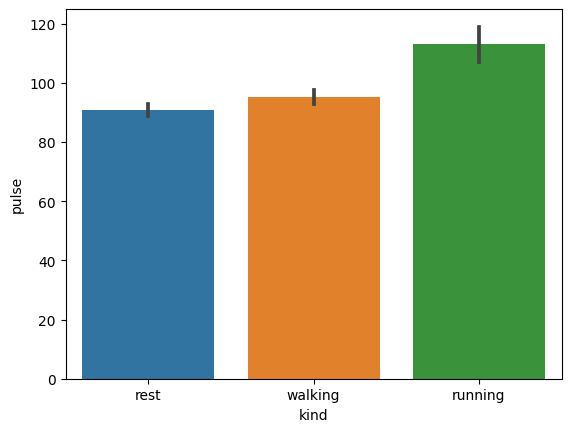

In [142]:
sns.barplot(sport, 
            x="kind", y="pulse")

None

**seaborn** умеет работать с `Axes`, для этого нужно указывать соответствующий аргумент (`ax`) в функцию для построения графика

<Axes: xlabel='time', ylabel='pulse'>

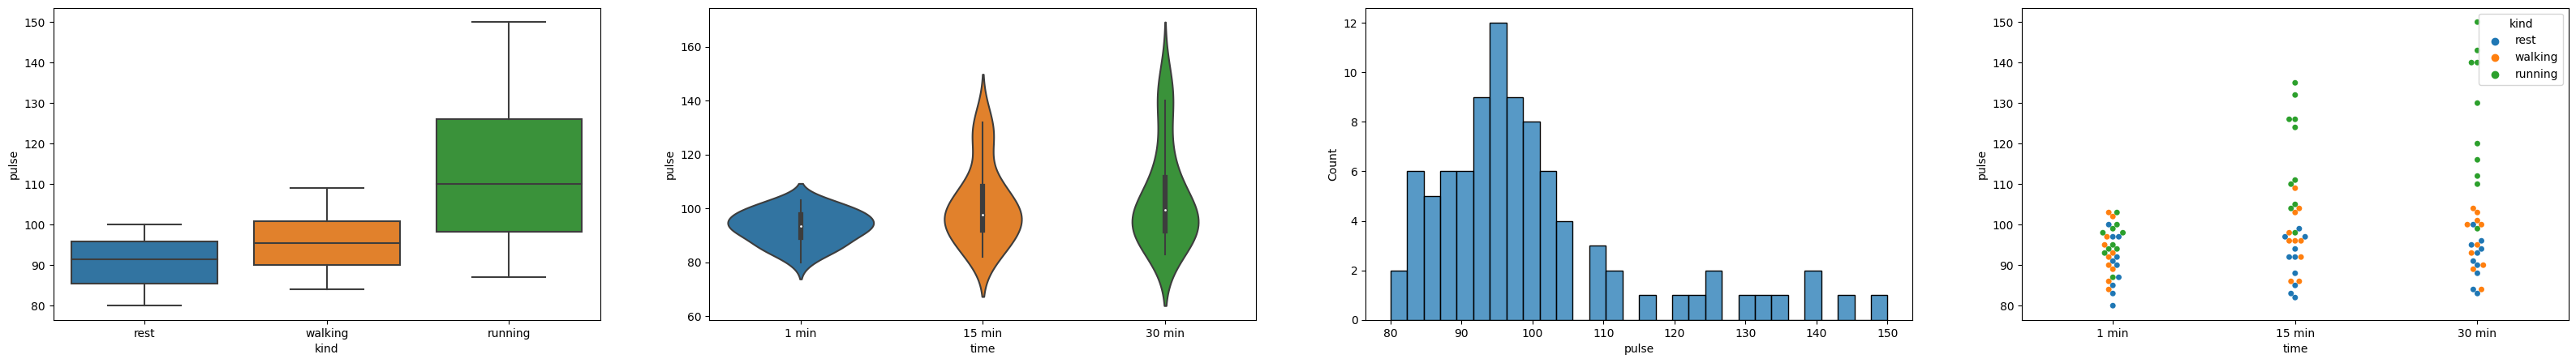

In [148]:
fig, axes = plt.subplots(ncols=4, figsize=(40, 5))

sns.boxplot(data=sport, x="kind", y="pulse",  ax=axes[0])

sns.violinplot(data=sport, x="time", y="pulse",  ax=axes[1])

sns.histplot(data=sport, x="pulse", bins=30, ax=axes[2])

sns.swarmplot(data=sport, x="time", y="pulse", hue="kind", ax=axes[3])